In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

## Homework

1. Download and plot 3 apparently related sets of data with at least. Each set should contain at least two related variables. You should explain *how* variables in each set of data are related. Plot each set using the scatter plot function *and* the line graph function. For example, you might the obseved rate of unemployement and the natural rate of unemployment in the same graph. To find data, search for data at FRED and use the code associated with the data. For example, the [CPI measure that includes urban items](https://fred.stlouisfed.org/series/CPIAUCSL) is identified by the code, *CPIAUCSL*.




In [2]:
def gather_data(data_codes,
                start, 
                end = datetime.datetime.today(),
                freq = "M"):
    df_init = False
    for key, code in data_codes.items():
        if df_init == False:
            df = web.DataReader(
                code, "fred", start, end).resample(freq).mean() # .first() .last() .max() .median() etc are other options
            df.rename(columns = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
    return df

Because financial assets typically generate returns, an increase in the share of financial assets held by the top 1% should result in an increase in networth. Similarly, because financial assets are viewed as good things to buy, as the networth share increases, the financial assets share should increase as well.

In [3]:
data_codes  = {"Share of Networth": "WFRBST01134",
               "Share of Financial Assets": "WFRBST01112"}
start = datetime.datetime(1989, 7, 1)
end = datetime.datetime(2022, 1, 1)

In [4]:
data = gather_data(data_codes = data_codes, 
                   start = start,
                   end = end,
                   freq = "Q")
data

,Share of Networth,Share of Financial Assets
DATE,,
1989-09-30,23.6,26.8
1989-12-31,23.6,26.7
1990-03-31,23.5,26.5
1990-06-30,23.7,26.6
1990-09-30,23.2,26.0
...,...,...
2021-03-31,31.9,34.5
2021-06-30,32.1,35.0
2021-09-30,32.1,35.3


<AxesSubplot: xlabel='DATE'>

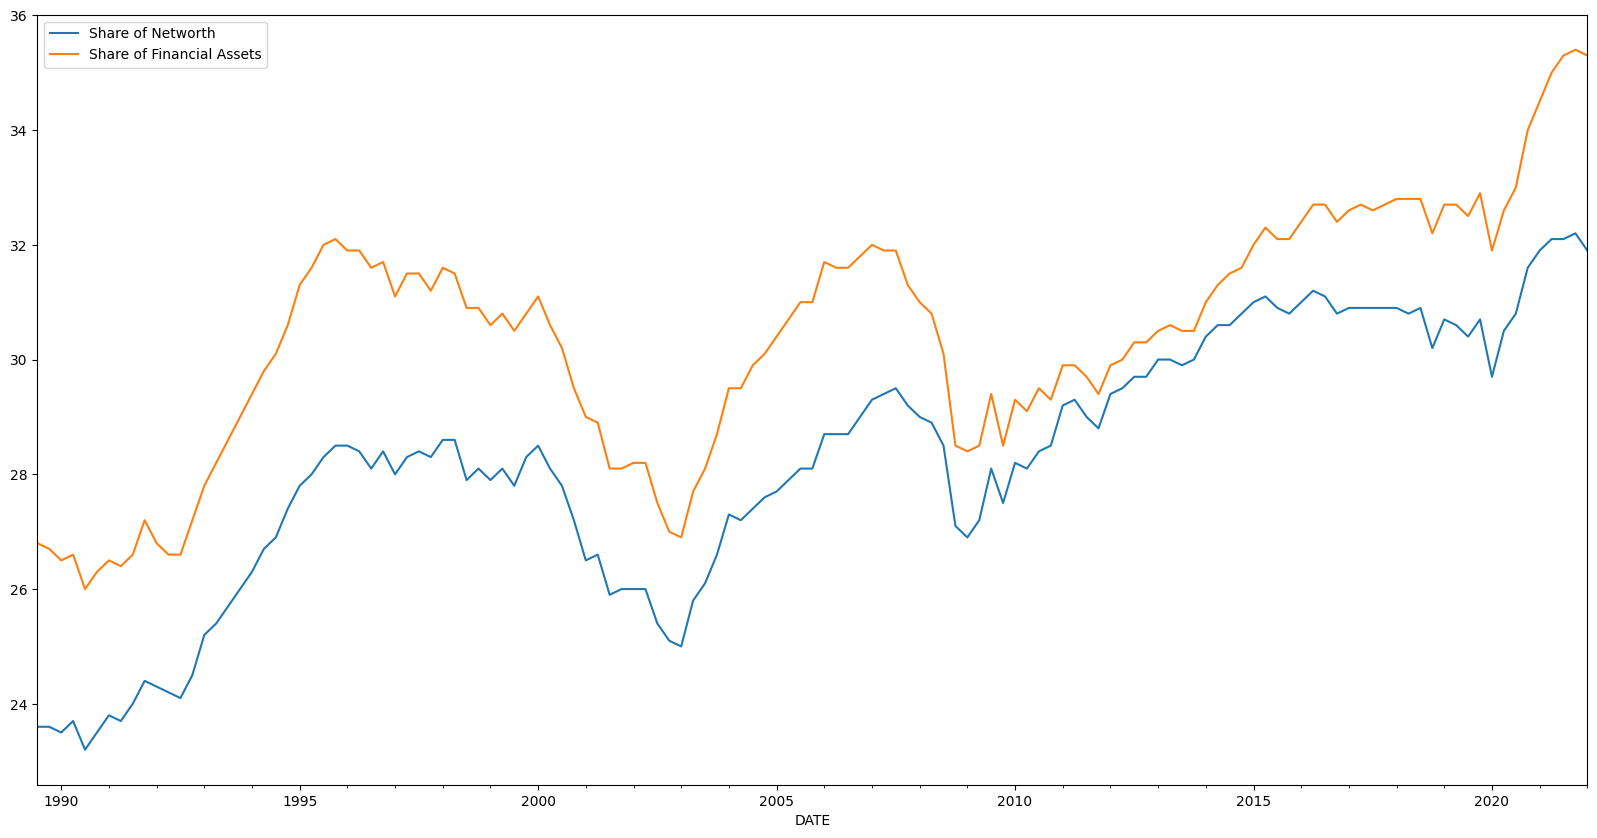

In [5]:
fig, ax = plt.subplots(figsize = (20,10))
data.plot.line(ax = ax)

<AxesSubplot: xlabel='Share of Networth', ylabel='Share of Financial Assets'>

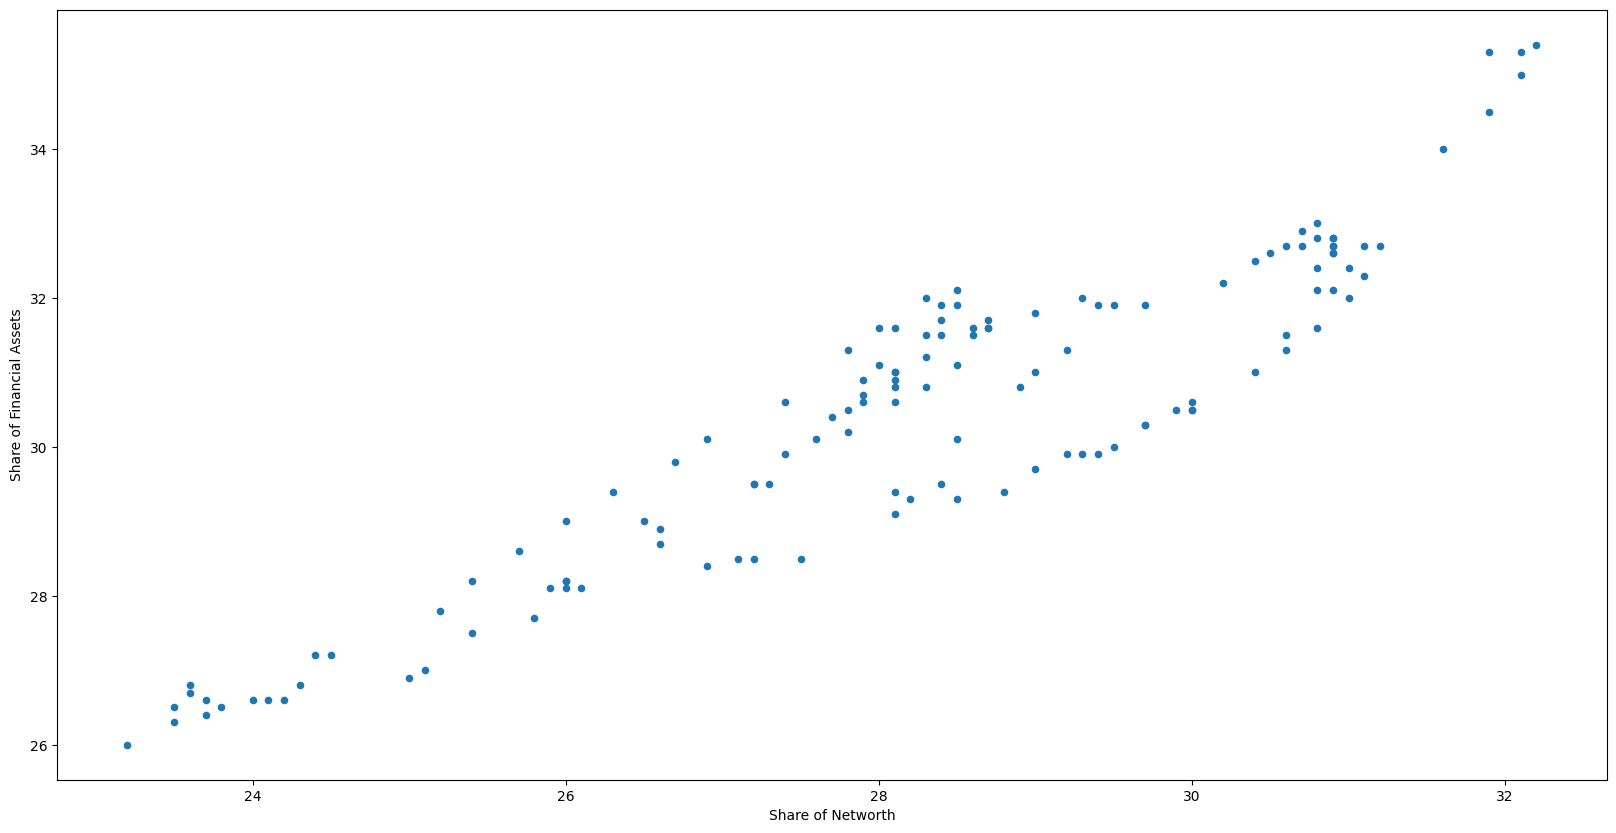

In [6]:
fig, ax = plt.subplots(figsize = (20,10))
x = "Share of Networth"
y = "Share of Financial Assets"
data.plot.scatter(x=x, y=y, ax = ax)

As the minimum wage increases, lower income workers will spend more, raising inflation. This raise in inflation will effect home prices

In [7]:
data_codes  = {"Minimum Wage Rate NJ": "STTMINWGNJ",
               "All-Transactions House Price Index NJ": "NJSTHPI"}
start = datetime.datetime(1975, 1, 1)
end = datetime.datetime(2022, 7, 1)

In [8]:
data = gather_data(data_codes = data_codes, 
                   start = start,
                   end = end,
                   freq = "A")
data

,Minimum Wage Rate NJ,All-Transactions House Price Index NJ
DATE,,
1975-12-31,1.50,61.5500
1976-12-31,2.20,63.5725
1977-12-31,2.20,66.8075
1978-12-31,2.20,75.1075
1979-12-31,2.50,89.4750
1980-12-31,3.10,101.5325
1981-12-31,3.35,105.9000
1982-12-31,3.35,108.2775
1983-12-31,3.35,115.5975


<AxesSubplot: xlabel='DATE'>

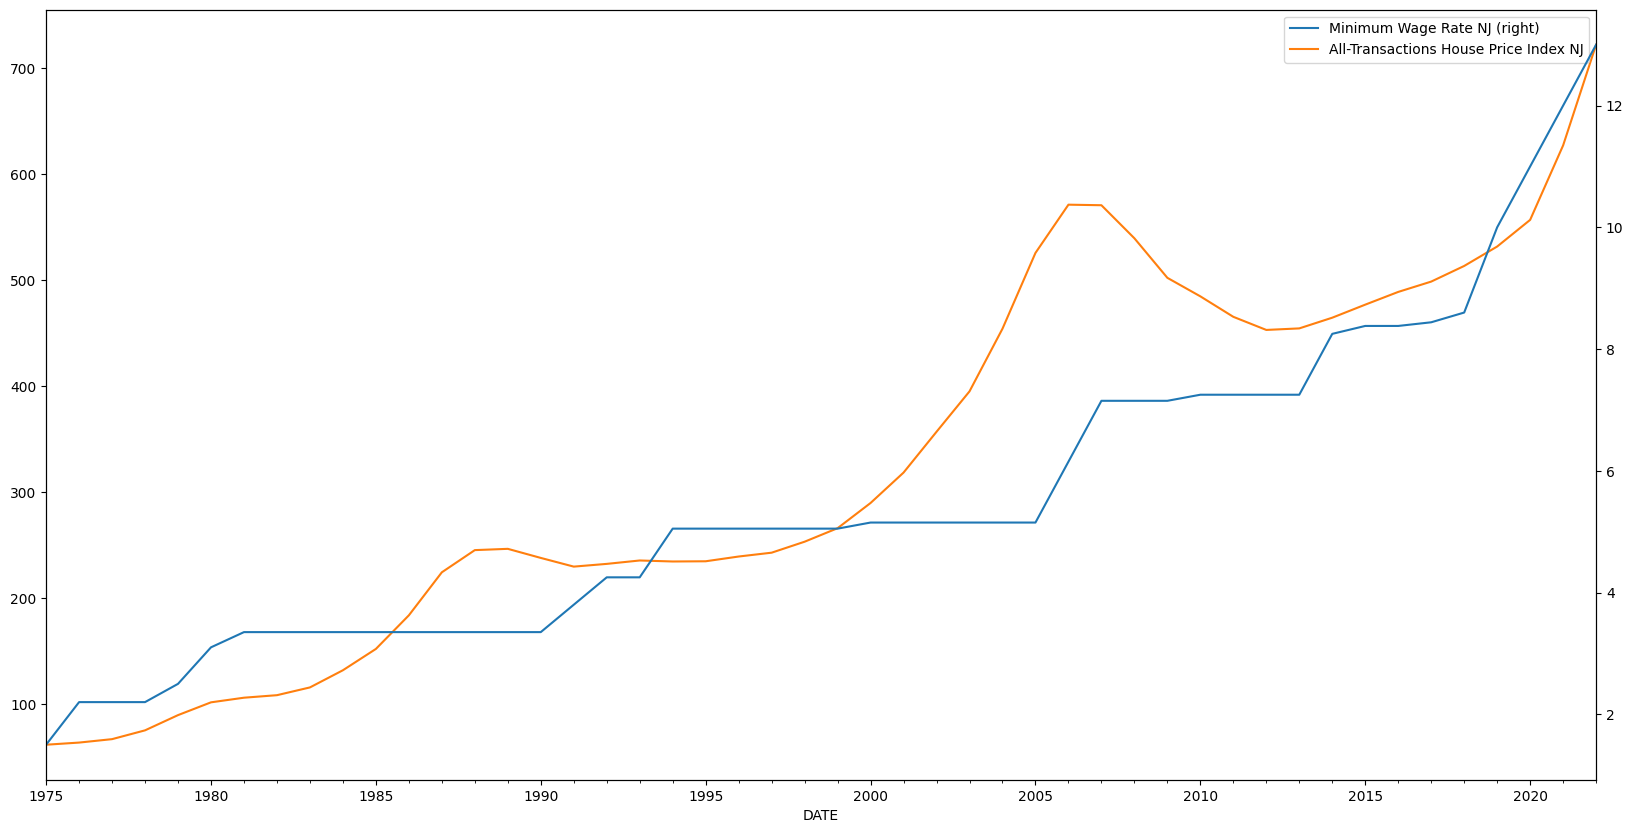

In [9]:
fig, ax = plt.subplots(figsize = (20,10))
data.plot.line(ax = ax, secondary_y="Minimum Wage Rate NJ")

<AxesSubplot: xlabel='Minimum Wage Rate NJ', ylabel='All-Transactions House Price Index NJ'>

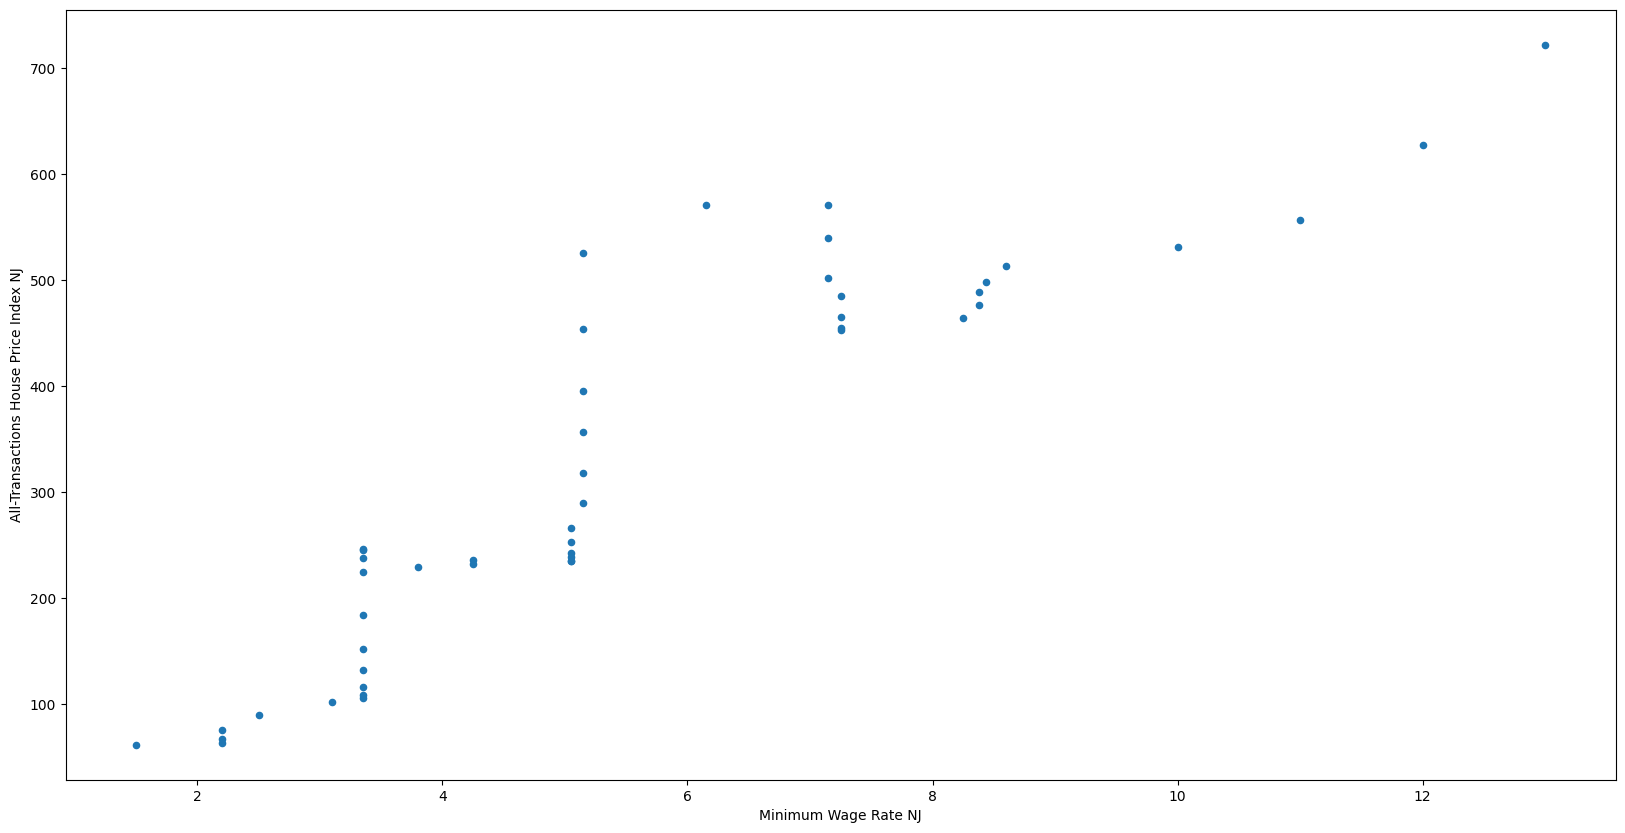

In [10]:
fig, ax = plt.subplots(figsize = (20,10))
x = "Minimum Wage Rate NJ"
y = "All-Transactions House Price Index NJ"
data.plot.scatter(x=x, y=y, ax = ax)

Because manufacturers usually produce some amount of CO2 emissions, a high number of new manufacturing businesses should result in higher emissions

In [11]:
data_codes  = {"Business Applications: Manufacturing": "BABANAICSMNFSAUS",
               "Industrial Carbon Dioxide Emissions, All Fuels for United States": "EMISSCO2TOTVICTOUSA"}
start = datetime.datetime(2004, 7, 1)
end = datetime.datetime(2020, 1, 1)

In [12]:
data = gather_data(data_codes = data_codes, 
                   start = start,
                   end = end,
                   freq = "A")
data

,Business Applications: Manufacturing,"Industrial Carbon Dioxide Emissions, All Fuels for United States"
DATE,,
2004-12-31,4450.166667,NaN
2005-12-31,4838.666667,1006.462407
2006-12-31,5105.583333,1009.170169
2007-12-31,5139.583333,1000.246172
2008-12-31,4886.250000,966.768261
2009-12-31,4541.333333,854.386156
2010-12-31,4642.583333,921.260349
2011-12-31,4771.333333,924.454079
2012-12-31,4847.916667,936.371840


<AxesSubplot: xlabel='DATE'>

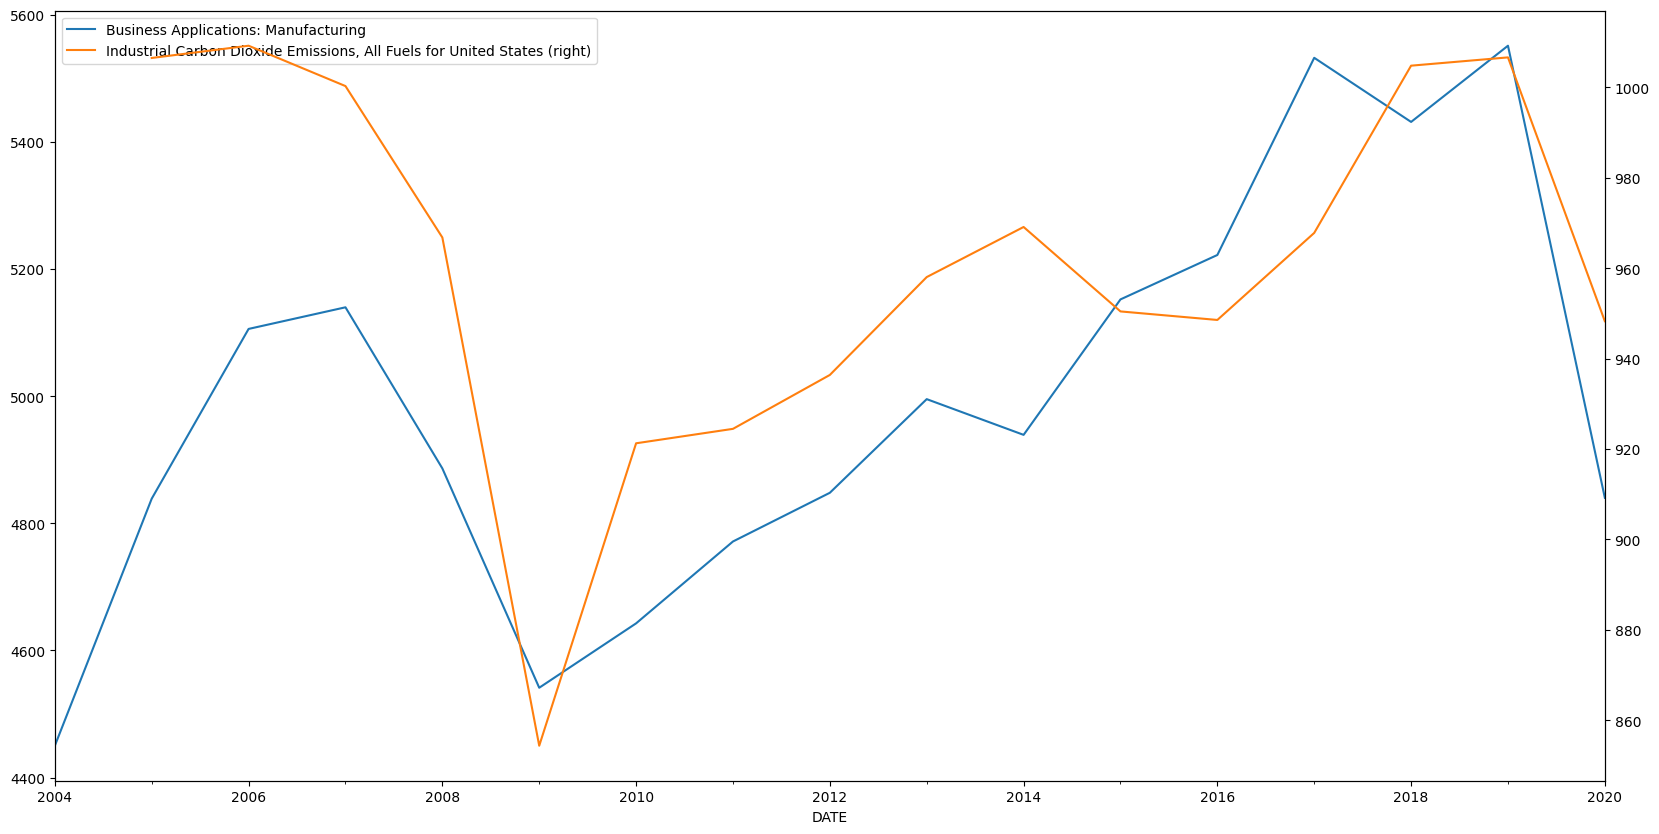

In [13]:
fig, ax = plt.subplots(figsize = (20,10))
data.plot.line(ax = ax, secondary_y="Industrial Carbon Dioxide Emissions, All Fuels for United States")

<AxesSubplot: xlabel='Business Applications: Manufacturing', ylabel='Industrial Carbon Dioxide Emissions, All Fuels for United States'>

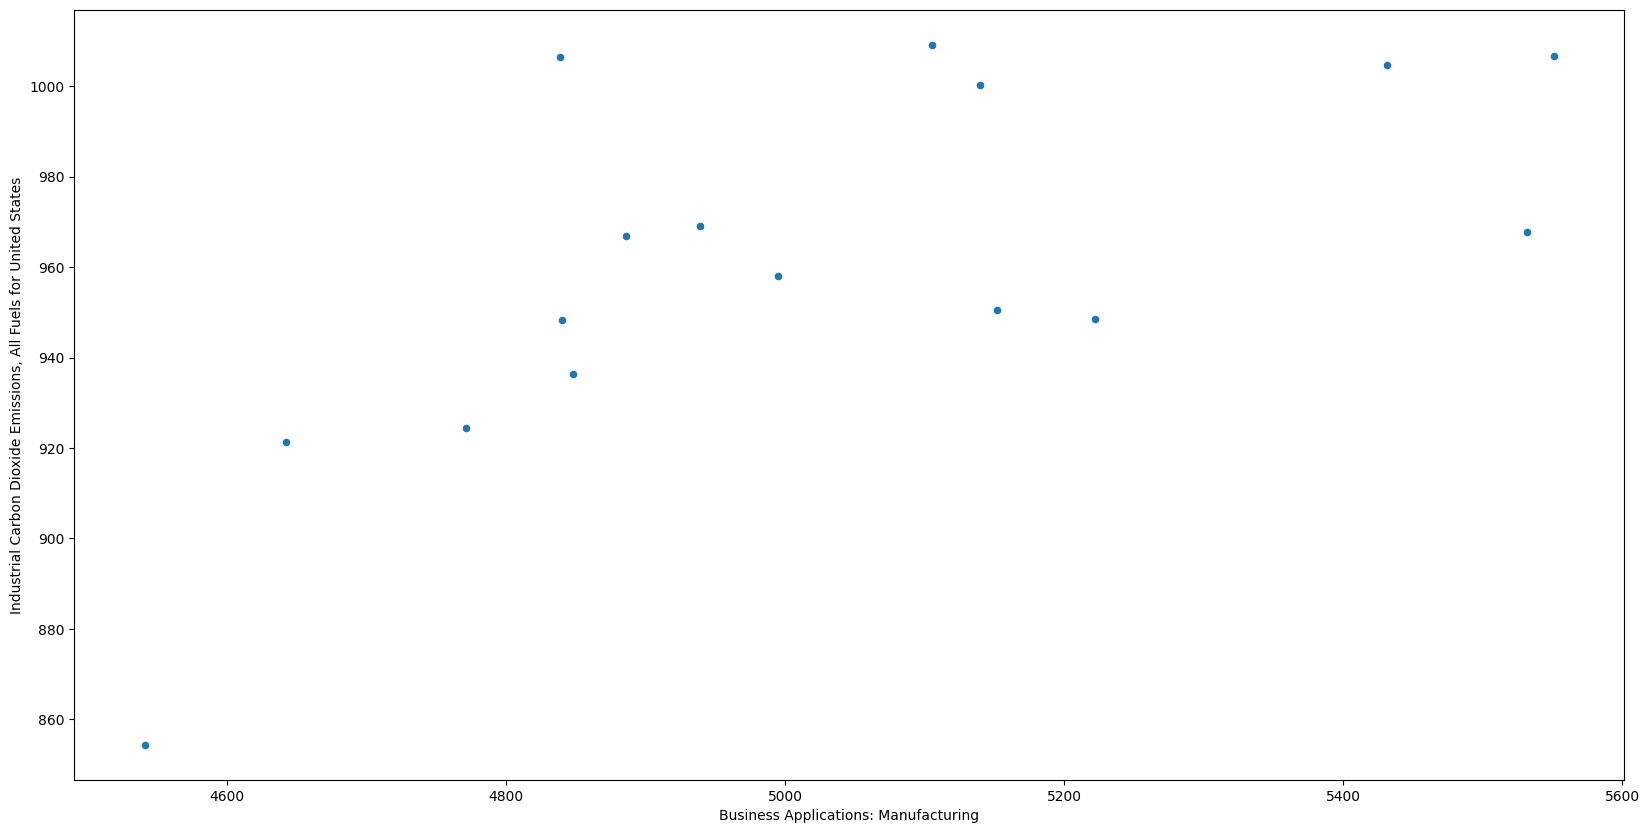

In [14]:
fig, ax = plt.subplots(figsize = (20,10))
x = "Business Applications: Manufacturing"
y = "Industrial Carbon Dioxide Emissions, All Fuels for United States"
data.plot.scatter(x=x, y=y, ax = ax)

2. Create a correlation matrix for quarterly observations of Nominal GDP, Real GDP, the Price Level (CPI or GDP Deflator), the quantity of currency in circulation and the federal funds rate for as large of a date range as possible. Then, calculate the year-over-year percent change for each each variable and save the results as variables in the same dataframe. Create a correlation matrix for these new variables.

How has the correlation between each variable changed? Why do you think the correlation changes after calculate the year-over-year percent change?

In [15]:
def corr_matrix_heatmap(data, dim = 20, pp = None):
        fig, ax = plt.subplots(figsize = (dim,dim))
        im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")  
        labels = data.keys()
        num_vars = len(labels)
        tick_labels = [label.replace(" ","\n") for label in labels]
        tick_font_size = 120 / num_vars
        val_font_size = 200 / num_vars
        plt.rcParams.update({'font.size': tick_font_size})
        xticks = np.arange(num_vars)
        plt.xticks(xticks, tick_labels, fontsize = tick_font_size, rotation=90)
        yticks = np.arange(num_vars)
        plt.yticks(yticks, tick_labels, fontsize = tick_font_size)
        # put all options choses above into use and create figure
        for i in range(len(labels)):
            for j in range(len(labels)):
                text = ax.text(i,j, str(round(data.values[i][j], 2)),
                              fontsize = val_font_size, ha = "center",
                               va = "center", color = "w")
        title_font = {"fontname":"Times New Roman"}  
        plt.title("Correlation", fontsize = 50, **title_font)   
        cbar = fig.colorbar(im)
        plt.show()
        if pp != None:
            pp.savefig(fig, bbox_inches="tight")

In [16]:
data_codes  = {"Nominal GDP": "GDP",
               "Real GDP": "GDPC1",
              "Consumer Price Index: Total All Items for the United States":"CPALTT01USM657N",
              "Currency in Circulation":"CURRCIR",
              "Effective Federal Funds Rate":"EFFR"}
start = datetime.datetime(2000, 7, 1)
end = datetime.datetime.today()

In [17]:
data = gather_data(data_codes = data_codes, 
                   start = start,
                   end = end,
                   freq = "Q")
data

,Nominal GDP,Real GDP,Consumer Price Index: Total All Items for the United States,Currency in Circulation,Effective Federal Funds Rate
DATE,,,,,
2000-09-30,10318.165,13183.890,0.250951,570.402000,6.511429
2000-12-31,10435.744,13262.250,0.057582,576.533333,6.499677
2001-03-31,10470.231,13219.251,0.419829,584.237333,5.621148
2001-06-30,10599.000,13301.394,0.339444,591.057000,4.330781
2001-09-30,10598.020,13248.142,0.056602,606.692667,3.487937
...,...,...,...,...,...
2021-12-31,24349.121,20006.181,0.543135,2212.581333,0.079524
2022-03-31,24740.480,19924.088,1.029998,2241.041667,0.124355
2022-06-30,25248.476,19895.271,1.011404,2273.359667,0.758571


In [18]:
data_corr = data.corr()

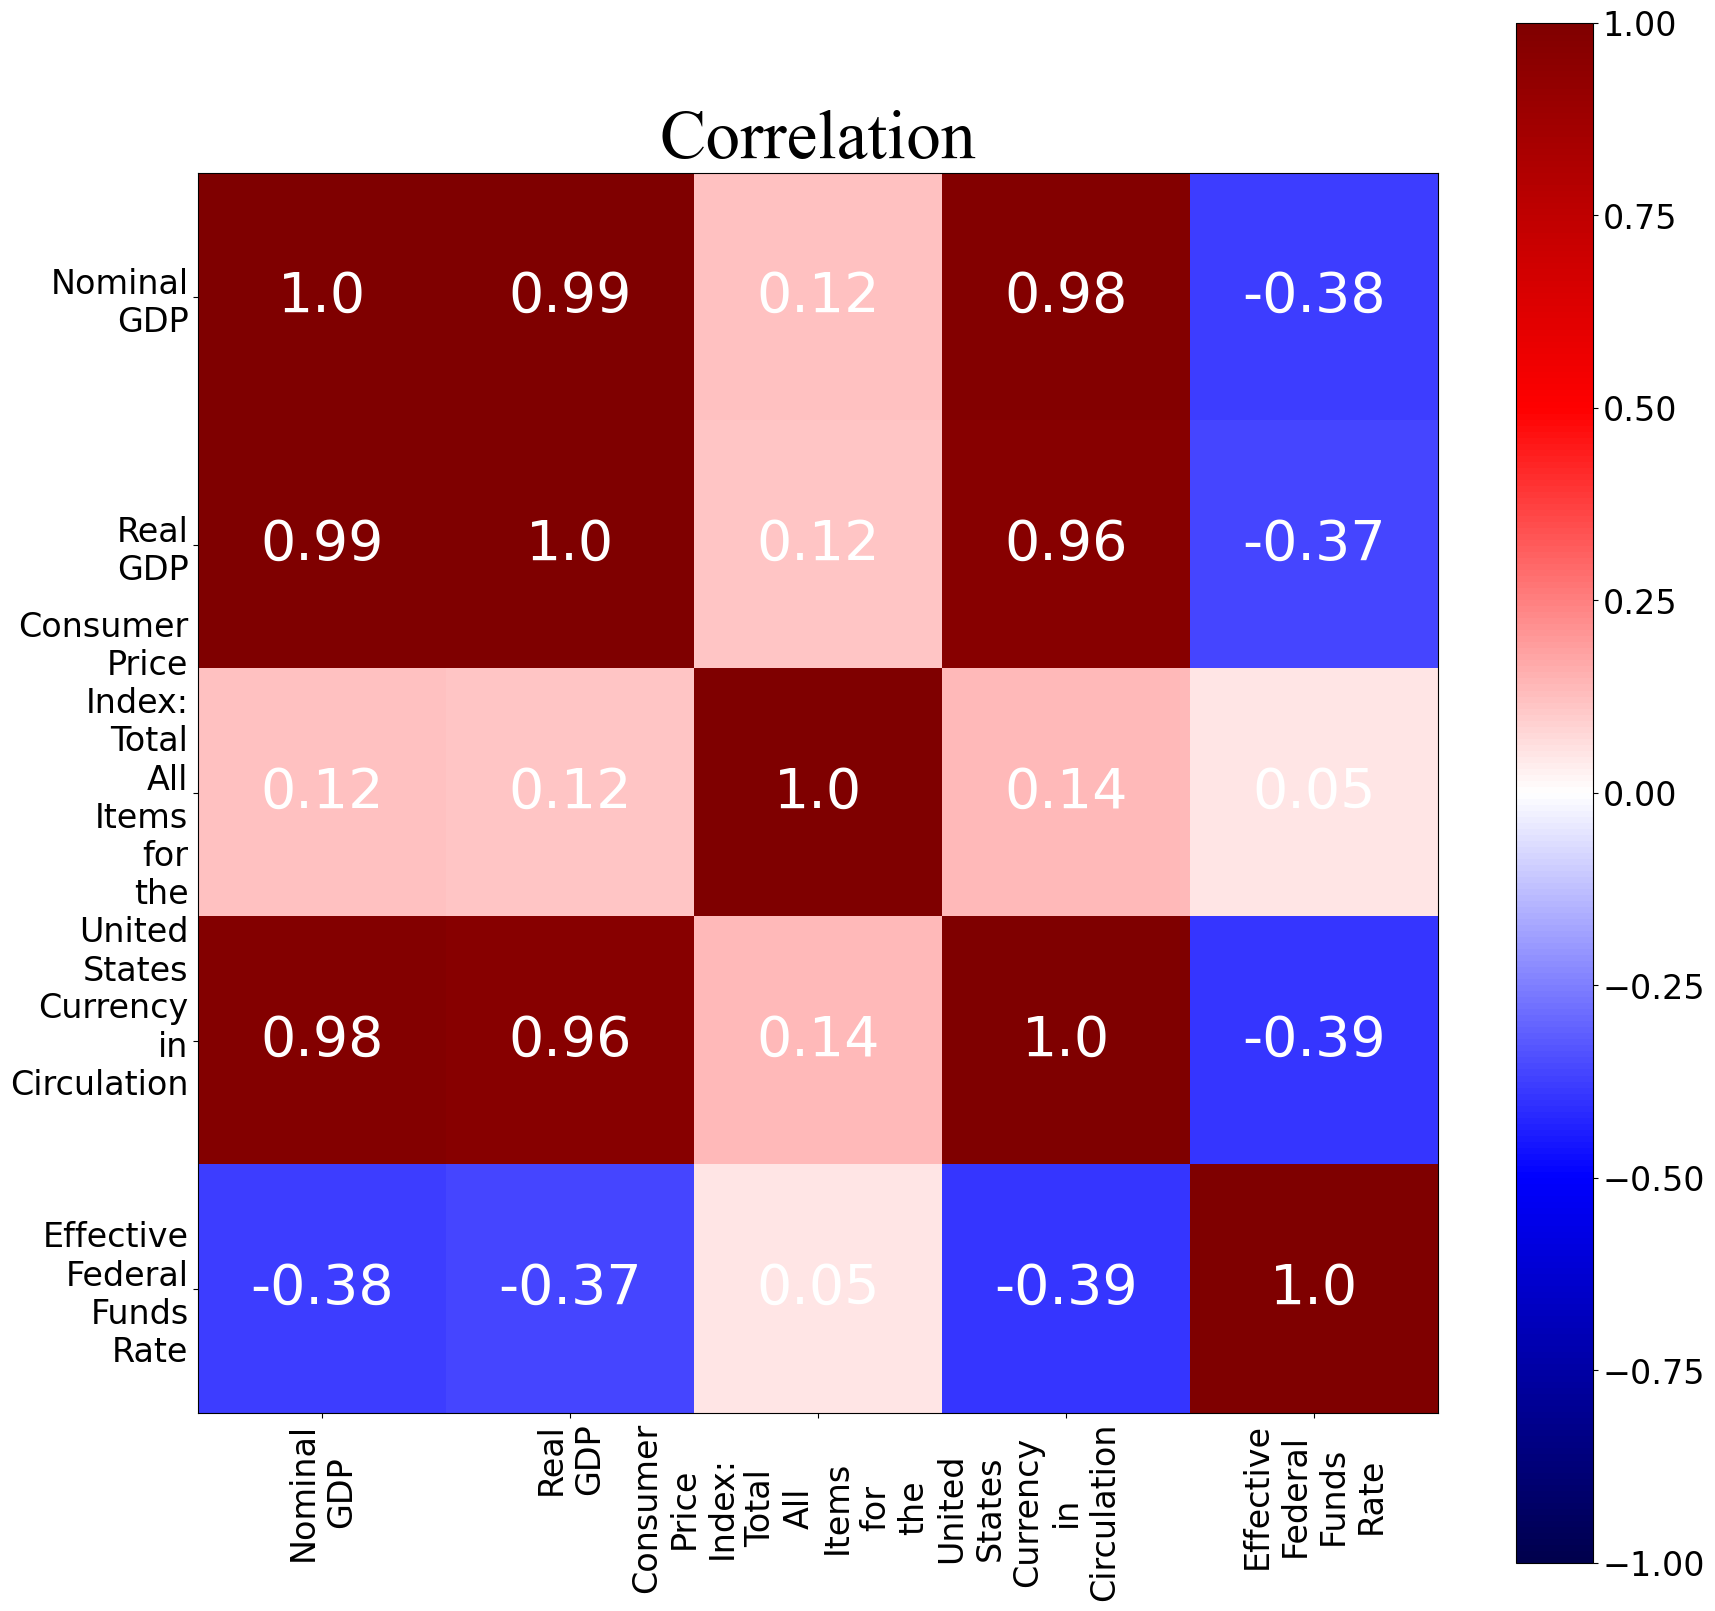

In [19]:
corr_matrix_heatmap(data_corr, dim = 20, pp=None)

In [20]:
data['% Change in Nominal GDP'] = (data['Nominal GDP'] / data['Nominal GDP'].shift(4) - 1).fillna(0)
data['% Change in Real GDP'] = (data['Real GDP'] / data['Real GDP'].shift(4) - 1).fillna(0)
data['% Change in CPI'] = (data['Consumer Price Index: Total All Items for the United States'] / data['Consumer Price Index: Total All Items for the United States'].shift(4) - 1).fillna(0)
data['% Change in Currency in Circulation'] = (data['Currency in Circulation'] / data['Currency in Circulation'].shift(4) - 1).fillna(0)
data['% Change in Effective Federal Funds Rate'] = (data['Effective Federal Funds Rate'] / data['Effective Federal Funds Rate'].shift(4) - 1).fillna(0)
data

,Nominal GDP,Real GDP,Consumer Price Index: Total All Items for the United States,Currency in Circulation,Effective Federal Funds Rate,% Change in Nominal GDP,% Change in Real GDP,% Change in CPI,% Change in Currency in Circulation,% Change in Effective Federal Funds Rate
DATE,,,,,,,,,,
2000-09-30,10318.165,13183.890,0.250951,570.402000,6.511429,0.000000,0.000000,0.000000,0.000000,0.000000
2000-12-31,10435.744,13262.250,0.057582,576.533333,6.499677,0.000000,0.000000,0.000000,0.000000,0.000000
2001-03-31,10470.231,13219.251,0.419829,584.237333,5.621148,0.000000,0.000000,0.000000,0.000000,0.000000
2001-06-30,10599.000,13301.394,0.339444,591.057000,4.330781,0.000000,0.000000,0.000000,0.000000,0.000000
2001-09-30,10598.020,13248.142,0.056602,606.692667,3.487937,0.027123,0.004874,-0.774451,0.063623,-0.464336
...,...,...,...,...,...,...,...,...,...,...
2021-12-31,24349.121,20006.181,0.543135,2212.581333,0.079524,0.121836,0.057171,20.848087,0.076444,-0.106798
2022-03-31,24740.480,19924.088,1.029998,2241.041667,0.124355,0.108750,0.036837,0.838030,0.065635,0.627821
2022-06-30,25248.476,19895.271,1.011404,2273.359667,0.758571,0.095524,0.017960,0.188644,0.048985,10.033766


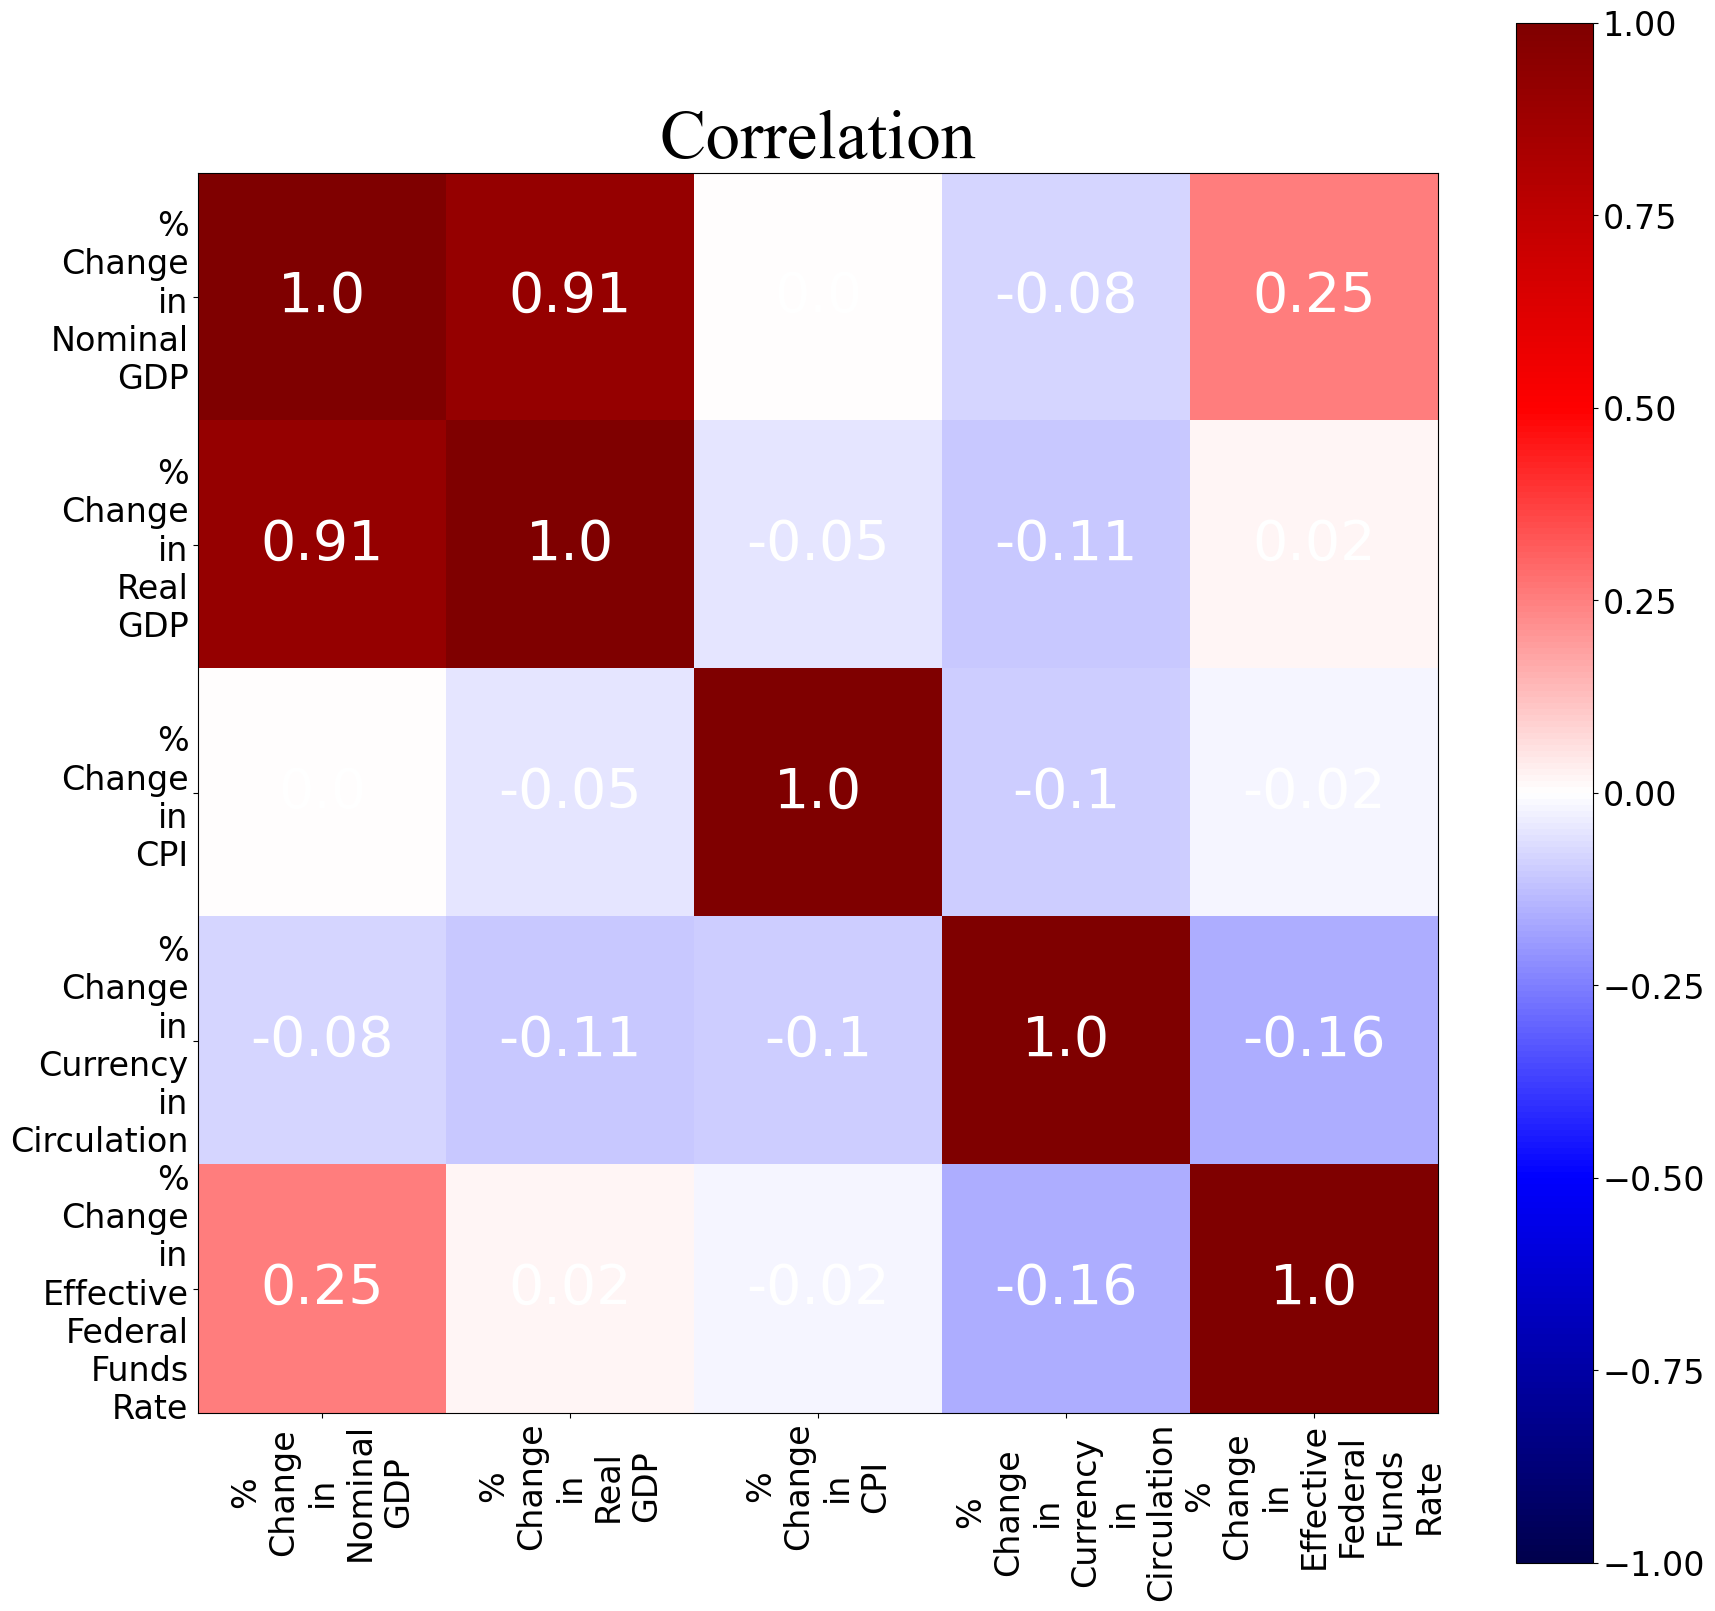

In [21]:
new_corr = data[['% Change in Nominal GDP', '% Change in Real GDP', '% Change in CPI', '% Change in Currency in Circulation', '% Change in Effective Federal Funds Rate']].corr()
corr_matrix_heatmap(new_corr, dim = 20, pp=None)

Because Percent change is not a linear transformation, it changes the relationship between the variables and, thus, the correlation value. The correlation between every pair of variables (obviously excluding a variable paired with itself) has gotten closer to zero. One noteworthy change, though, is the change in sign of the correlation between % Change in Effective Federal Funds Rate and % Change in Nominal GDP.